# Generarea si vizualizarea curbelor 

## 1. Curbe plane

O curba plana diferentiabila, data parametric, este imaginea, $im(r)$, a unei aplicatii diferentiabile  $r:[a,b]\to\mathbb{R}^2$, $r(t)=(x(t), y(t))$.  Astfel curba este submultimea din plan:
$$\Gamma=\{(x(t), y(t))\in\mathbb{R}^2\:|\: t\in[a,b]\}$$

Interpretand $t\in[a,b]$ ca fiind timpul, curba data parametric are o generare cinematica: ea este traiectoria unui punct mobil, a carui miscare este monitorizata in intervalul de timp $[a,b]$. Punctul de coordonate $(x(t), y(t))$ da pozitia punctului mobil la momentul $t$.


Daca aplicatia parametrizare este de clasa $C^2$ (exista derivatele $x'(t), y'(t), x''(t), y''(t)$ si acestea sunt continue), atunci fiecarui punct $(x(t), y(t))$ al traiectoriei i se asociaza vectorul viteza la momentul $t$:

 $$\dot{\vec{r}}(t)=(x'(t), y'(t))^T,$$

respectiv acceleratia la momentul $t$:

$$\ddot{\vec{r}}(t)=(x''(t), y''(t))^T$$

#### Discretizarea si vizualizarea unui curbe plane

Pentru a genera o curba plana folosind pachetul `matplotlib`, divizam intervalul de timp $[a,b]$ prin puncte echidistante, $t_i$, cu pasul $h=(b-a)/N$, unde $N$ este numarul de intervale de diviziune:

$t_i=a+i*h$, $i=\overline{0,N}$.

In fiecare moment de timp $t_i$, se evalueaza functiile $x(t), y(t)$ ce definesc parametrizarea
curbei si se obtin $N+1$ puncte de pe curba, $(x(t_i), y(t_i))$, $\overline{0,N}$. Apelul
functiei 

`plt.plot (x,y)` 

conduce la generarea unei aproximatii a curbei, aproximatie ce consta din segmentele ce unesc cate doua puncte consecutive $(x(t_i), y(t_i))$, $(x(t_{i+1}), y(t_{i+1}))$, $i=\overline{0,N}$. Cu cat pasul de diviziune $h$ este mai mic (sau echivalent, $N$ este mai mare), cu atat aproximatia curbei este mai buna.

In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def Curba(a, b, N):
    h=(b-a)/N
    t=np.arange(a,b, h)
    return (np.cos(t)+t*np.sin(t), np.sin(t)-t*np.cos(t))# functia returneaza  tuple (x(t), y(t))
    

Pentru a intelege definitia acestei functii, o apelam mai intai pentru un $N$ mic si afisam tipul
coordonatelor tuple-ului returnat:

(-6.0, 8.0, -8.0, 8.0)

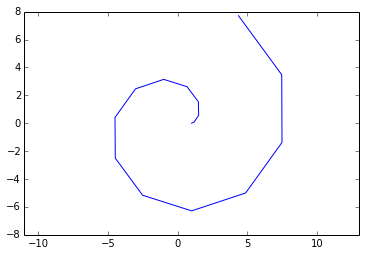

In [23]:
(x,y)=Curba(0, 3*np.pi, 15)
plt.plot(x, y)
plt.axis('equal')

In [24]:
print type(x), type(y)


<type 'numpy.ndarray'> <type 'numpy.ndarray'>


In [25]:
print x.round(3)

[ 1.     1.178  1.504  1.484  0.668 -1.    -3.025 -4.492 -4.472 -2.515  1.
  4.871  7.48   7.459  4.361]


In [26]:
print y.round(3)

[ 0.     0.079  0.563  1.534  2.621  3.142  2.462  0.408 -2.504 -5.163
 -6.283 -5.004 -1.379  3.475  7.704]


Deci functia `Curba` returneaza un tuple 2D, $(x,y)$, in care fiecare coordonata este un array 1D (un vector). Mai precis, daca notam  cu $(X(t), Y(t))$ coordonatele parametrizarii curbei,

$$X(t)=\cos(t)+t\sin(t), \quad Y(t)=\sin(t)-t\cos(t)$$

atunci vectorii $x$  si $y$, coordonate ale tuple-ului returnat sunt:

$$x=[X(t[0]), X(t[1]), \ldots, X(t[N])]$$

$$y=[Y(t[0]), Y(t[1]), \ldots, Y(t[N])]$$

Apeland acum functia cu un numar mai mare de puncte de diviziune obtinem:

(-6.0, 8.0, -8.0, 10.0)

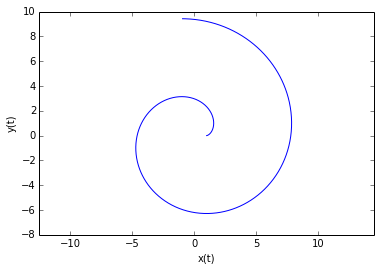

In [27]:
(x,y)=Curba(0, 3*np.pi, 1500)
plt.plot(x, y)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.axis('equal')


Astroida:

In [28]:
def astroida(t,  A=1):#(x(t),y(t)=(A*cos^3(t), A*sin^3(t))
    
    return (A*np.power(np.cos(t), 3), A*np.power(np.sin(t), 3))

(-1.0, 1.0, -1.0, 1.0)

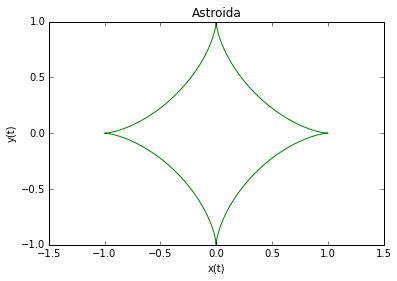

In [29]:
t=np.linspace(0,2*np.pi, 1000)

(x,y)=astroida(t)
plt.plot(x,y, 'g')
plt.title('Astroida')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.axis('equal')# setarea pe 'equal' are ca efect alegerea aceleasi unitati de masura pe Ox si Oy
                 # in caz contrar (cazul implicit) figura este deformata.

**Curba Lissajous** are parametrizarea:
        $$\left\{\begin{array}{lll} x(t)&=&A\sin( at+\delta)\\
                                y(t)&=&B\sin(bt)\end{array}\right.\quad t\in[0, 2\pi]$$



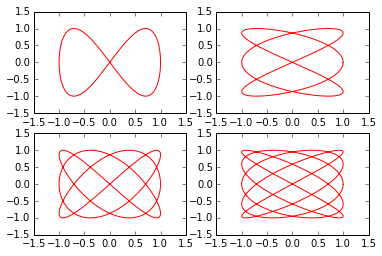

In [30]:
def Lissajous(t,a,b, A=1, B=1, d=np.pi/2):
    return (A*np.sin(a*t+d), B*np.sin(b*t))

t=np.arange(0,2*np.pi, 0.01)
pab=np.array([[1,2],[3,2], [3,4], [5,4]],float)
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.axis([-1.5,1.5, -1.5, 1.5])

    x,y=Lissajous(t, pab[i-1, 0], pab[i-1, 1])
    plt.plot(x,y, 'r')


Pentru a genera vectorii viteza/acceleratie in cateva momente, $t_i$, asociati traiectoriei parametrizate de $r(t)=(x(t), y(t))$, se evalueaza vectorul $\dot{\vec{r}}(t)$, respectiv $\ddot{\vec{r}}(t)$
in $t_i$ si se apeleaza functia `plt.quiver(X, Y, U, V)` unde  $X$, respectiv $Y$,  este array-ul 1D de coordonate
$x(t_i)$, respectiv  $y(t_i)$ , iar $U$ si $V$ au respectiv coordonatele $x'(t_i)$ si $y'(t_i)$,
in cazul vitezei, si $x''(t_i)$, $y''(t_i)$, in cazul acceleratiei.

De exemplu sa trasam curba parametrizata de:

$$x(t)=t\sin(t), \quad y(t)=\cos(t), \quad t\in[0, 2\pi]$$

si vectorii viteza, respectiv acceleratie, in 8 puncte ale traiectoriei, atinse in miscarea punctului mobil in  momentele $T[i]$, unde `T=np.linspace(0,2*np.pi, 8)`:

normele vectorilor viteza:
[ 0.     1.522  1.921  1.312  2.339  3.658  3.233  1.483  3.761  6.283]
normele vectorilor acceleratie:
[ 2.5    1.579  1.06   2.912  3.166  1.567  2.733  5.167  5.249  2.5  ]


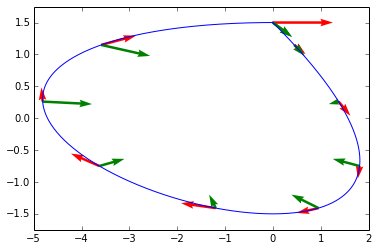

In [31]:
def r(t):
    return(t*np.sin(t), 1.5*np.cos(t))
   
def rprim(t):
    return (np.sin(t)+t*np.cos(t), -1.5*np.sin(t))

def rsecund(t):
    return (2*np.cos(t)-t*np.sin(t), -1.5*np.cos(t))

plt.axis([-5,2, -1.75, 1.75])    
t=np.arange(0, 2*np.pi, 0.01)    
x,y=r(t)    
plt.plot(x,y)#traseaza curba

T=np.linspace(0,2*np.pi, 10)
X,Y=r(T)
U,V=rprim(T)
plt.quiver(X,Y,U,V, color='r', units='x', scale=5)
normv=np.sqrt(U**2+V**2)
print 'normele vectorilor viteza:\n', normv.round(3)
W,Z=rsecund(T)
plt.quiver(X,Y,W,Z, color='g', units='x', scale=5)
norma=np.sqrt(W**2+Z**2)
print 'normele vectorilor acceleratie:\n', norma.round(3)

Observam atat din valorile normelor, cat si din imaginile vectorilor viteza/acceleratie ca in puncte diferite au valori diferite. Mai mult in punctele curbei cu curbura mai mare viteza are norma mai mica si acceleratia mai mare (vezi Cursul 13, curbura curbelor).



#### Curbe in coordonate polare

In afara de sistemul ortogonal de axe, $xOy$,  $\mathbb{R}^2$ se poate raporta si la un sistem polar de coordonate.

Un reper polar consta dintr-o pereche $(O;v)$, unde $O$ este un punct fixat, numit pol  si $v\in\mathbb{R}^2$, un vector nenul ce defineste axa polara, $Ox$, care este  axa de origine $O$, directie si sens $v$.

Pozitia unui punct $M$ relativ la acest reper
se indica prin coordonatele $(r, \theta)$, numite *coordonate polare*.  $r$ este distanta de la $M$ la $O$, $r=||\vec{OM}||$, iar 
$\theta$ este masura in radiani a unghiului dintre $v$ (deci $Ox$) si $\vec{OM}$.

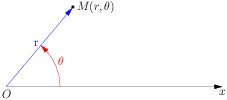

In [32]:
from IPython.display import Image
Image(filename='Imag/polar.png')

Ducand o perpendiculara in $O$ pe axa polara construim sistemul ortogonal drept $xOy$, asociat celui polar.


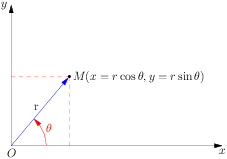

In [33]:
Image(filename='Imag/ortpolar.png')

Astfel punctul de coordonate polare $(r, \theta)$ are coordonatele carteziene $(x,y)$, unde

$$x=r\cos(\theta), \quad y=r\sin(\theta)$$

O curba in coordonate polare are ecuatia $r=f(\theta)$, $\theta\in[\alpha, \beta]$. Cu alte cuvinte, curba este 
constituita din multimea punctelor din plan ce au coordonatele polare $(r=f(\theta), \theta)$.

Exemplu de curba in coordonate polare este *cardioida*, de ecuatie
 $r=a(1+\cos(\theta))$, $a>0$, $\theta\in[0, 2\pi]$.

Pentru a genera si vizualiza o curba in coordonate polare procedam astfel:
    se divizeaza intervalul  $[\alpha, \beta]$ prin puncte echidistante $\theta_i$ si se apeleaza
    functia `plt.polar(theta, r)`, unde vectorul `theta` are coordonatele $\theta_i$, iar vectorul `r` are coordonatele
    $f(\theta_i)$:

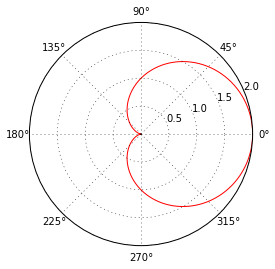

In [34]:
#Generarea Cardioidei
a=1;
theta=np.arange(0, 2*np.pi, 0.01)
r=a*(1+np.cos(theta))
plt.polar(theta, r, 'r')

Remarcam ca fara nici o comanda speciala, o data cu  apelul functiei `plt.polar` sunt generate cercuri
concentrice cu originea in pol si in lungul cercului exterior sunt marcate valorile in grade (nu radiani)
ale unghiului polar $\theta$. Sunt afisate si razele cercurilor concentrice. 

Cercul cu centrul in origine si de raza $a$, $x^2+y^2=a^2$, are in coordonate polare ecuatia:
$$r=a,$$
iar semidreapta  ce porneste din origine si formeaza cu axa polara unghiul $\theta_0$ are ecuatia $$\theta=\theta_0$$

Cu alte cuvinte, cercul $r=a$ este locul geometric al punctelor din plan ce au aceeasi distanta polara la $O$, distanta egala cu $a$. Semidreapta $\theta=\theta_0$ este locul geometric al punctelor din plan care au aceeasi coordonata polara $\theta_0$.

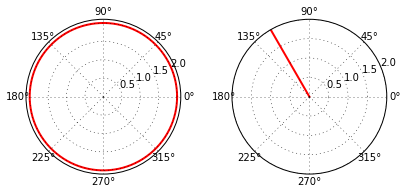

In [35]:
#cercul r=2

theta=np.arange(0, 2*np.pi, 0.01)
r=2*np.ones(theta.size)
plt.subplot(1,2,1, polar='true')
plt.plot(theta, r, 'r', lw=2)

#semidreapta theta= 2 pi/3
r=np.arange(0,2, 0.01)
theta=(2*np.pi/3)*np.ones(r.size)

plt.subplot(1,2,2, polar='true')
plt.plot(theta, r, 'r', lw=2)
plt.tight_layout(2)# aceasta functie include 2 spatii intre figurile din subplots


**Trifoiul cu 4 foi** are  ecuatia $r=\sin(4\theta)$, $\theta\in[0,2\pi]$.
    

(0.0, 6.2831853071795862, 0.0, 1.0)

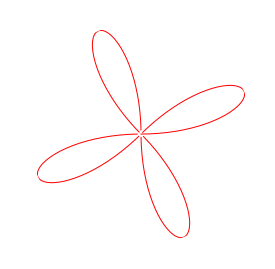

In [36]:
theta=np.arange(0,2*np.pi, 0.01)
plt.polar(theta, np.sin(4*theta), 'r')
plt.axis('off')# efectul acestui apel este suspendarea cercurilor si semidreptelor reperului polar

Curba $r=\sin(n\theta)$ este un trifoi cu $n$ foi. La fel si $r=\cos(n\theta)$, $\theta\in[0,2\pi]$. Experimentati!  

#### Curbe B&eacute;zier

Curbele date parametric sau in coordonate polare se pot genera doar daca se da efectiv expresia analitica
a parametrizarii, respectiv a functiei in coordonate polare. 

Curbele B&eacute;zier sunt curbe definite procedural, adica pornind de la un numar finit de puncte si un parametru $t\in[0,1]$ se genereaza algoritmic un punct pe o curba.

Curbele B&eacute;zier s-au nascut in laboratoarele de la Renault si Citro&euml;n in incercarea de a genera
capote pentru automobile,  mai deosebite. Ideea de baza consta in designul unui algoritm care sa genereze profilul unei capote
ce imita un poligon de control. 

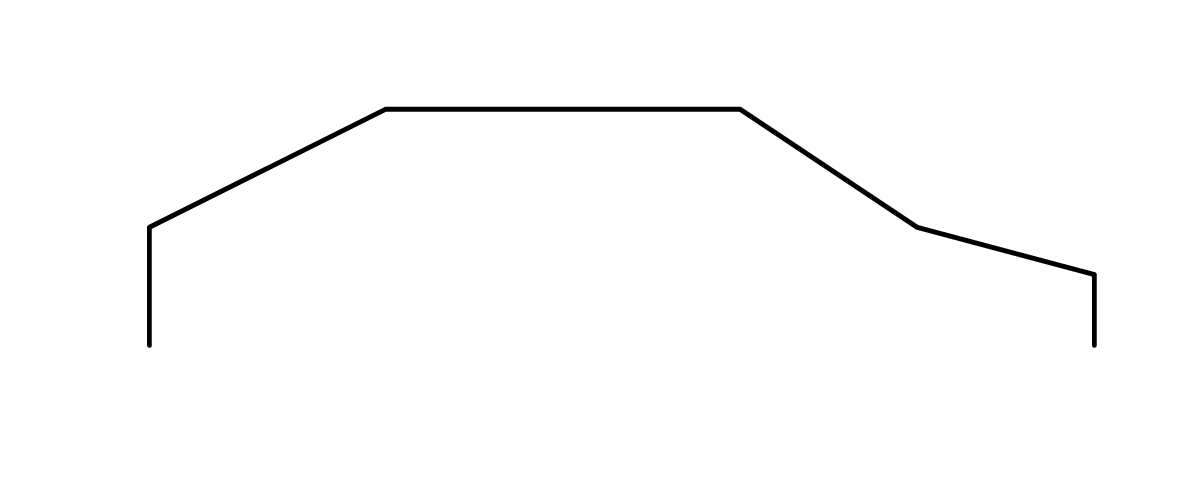

In [37]:
Image(filename='Imag/mimicauto.png')

Poligonul de control este succesiunea de segmente ce unesc cate doua puncte consecutive, numite puncte de control.

B&eacute;zier a definit curbele care-i poarta numele, definind curbe  polinomiale, adica curbe de forma:
$$\left\{\begin{array}{lll}x(t)&=&a_0+a_1 t+\cdots+ a_n t^n\\
y(t)&=&c_0+c_1t+\cdots+c_n t^n\end{array}\right.\quad t\in[a,b]$$
dar nu in acest fel, adica nu exprimand polinoamele in baza canonica $1,t, \ldots, t^n$, ci in baza Bernstein,
$B^n_0(t), B^n_1(t), \ldots, B_n^n(t)$, unde $B^n_k(t)=C_n^k t^k (1-t)^{n-k}$, $k=\overline{0,n}$.

O curba B&eacute;zier de puncte de control ${\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n$, este o curba avand parametrizarea $b(t)=B^n_0(t) {\bf b}_0+B^n_1(t) {\bf b}_1+\cdots+B^n_n(t) {\bf b}_n$, $t\in[0,1]$.

Daca $b(t)=(x(t), y(t))$, atunci coordonatele parametrizarii sunt:
$$
\left\{\begin{array}{lll}
x(t)&=&x({\bf b}_0)B^n_0(t)+x({\bf b}_1)B^n_1(t)+\cdots+x({\bf b}_n)B^n_n(t)\\
y(t)&=&y({\bf b}_0)B^n_0(t)+y({\bf b}_1)B^n_1(t)+\cdots+y({\bf b}_n)B^n_n(t)\end{array}\right.$$

unde  $x({\bf b}_k), y({\bf b}_k)$ semnifica  coordonata $x$, respectiv $y$, a punctului ${\bf b}_k$, $k=\overline{0,n}$.

 Curbele B&eacute;zier  folosite in grafica, in modelarea geometrica a diverse produse sau in designul fonturilor 
sunt curbele B&eacute;zier de grad 3, adica curbele B&eacute;zier definite de 4 puncte de control
${\bf b}_0$, ${\bf b}_1$, ${\bf b}_2$, ${\bf b}_3$.

De exemplu curba B&eacute;zier definita
de punctele de control:
    $${\bf b}_0=(2,-1),{\bf b}_1 =(4,5), {\bf b}_2=(7, 6), {\bf b}_3 =(9,1)$$  
are parametrizarea $$b(t)=(x(t), y(t)), \:\:\left\{\begin{array}{lll}
x(t)&=& 2B^3_0(t)+4B^3_1(t)+7B^3_2(t)+9B^3_3(t)\\
y(t)&=& -1B^3_0(t)+5B^3_1(t)+6B^3_2(t)+B^3_3(t)\end{array}\right.\quad t\in[0,1]$$


Spre deosebire de B&eacute;zier  care a definit curbele ce-i poarta numele printr-o parametrizare, de Casteljau a dat o definitie
procedurala a acestor curbe. 

Folosind definitia lui B&eacute;zier, adica parametrizarea  $b(t)=\sum_{k=0}^n {\bf b}_{k} B^n_k(t)$ a curbei, pentru a
calcula un punct pe curba corespunzator parametrului $t$,
trebuie evaluata aplicatia parametrizare in $t$.

Definitia procedurala da un algoritm de  calculul recursiv a unui punct corespunzator unui parametru $t\in[0,1]$, 
 pe curba  de puncte de
control ${\bf b}_0, {\bf b}_1, \ldots, {\bf b}_n $.

Pentru a
descrie algoritmul de Casteljau, numit si schema de Casteljau,
fixam cateva notiuni  pe care se bazeaza definitia
procedurala.

O multime din plan este convexa daca  o data cu doua puncte $A,B$, contine si segmentul ce le uneste.
Exemple de multimi convexe: o dreapta, un segment de dreapta, un compact triunghiular.

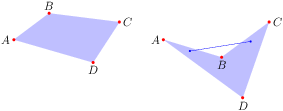

In [38]:
Image(filename='Imag/convNonconv.png')

In figura de mai sus multimea din stanga este convexa, iar cea din dreapta neconvexa, pt ca desi punctele
marcate cu albastru apartin multimii, segmentul ce le uneste nu este in intregime inclus in multime.

O combinatie convexa a punctelor
 $A_0, A_1, \ldots, A_n$  din $\mathbb{R}^2$ sau $\mathbb{R}^3$ este de forma:
 $$
\alpha_0A_0+\alpha_1A_1+\cdots+\alpha_n A_n, \quad \mbox{unde}\,\, \alpha_i\in [0,1],\: \mbox{si}\,\, \alpha_0+\alpha_1+\cdots+\alpha_n=1.$$

 Sa aratam ca o combinatie convexa reprezinta un punct. Intr-adevar, din relatia
 $\alpha_0+\alpha_1+\cdots+\alpha_n=1$ exprimam pe $\alpha_0=1-(\alpha_1+\alpha_2+\cdots+\alpha_n)$,  il inlocuim in relatia ce defineste combinatia convexa si obtinem: 
$$\begin{array}{l}A_0+\alpha_1(A_1-A_0)+\alpha_2(A_2-A_0)+\cdots+\alpha_n(A_n-A_0)=\\
\underbrace{A_0}_{punct}+\underbrace{\alpha_1\overrightarrow{A_0A_1}+\alpha_2\overrightarrow{A_0A_2}+\cdots+\alpha_n\overrightarrow{A_0A_n}}_{vector}:=\underbrace{P}_{punct}\end{array}$$

Infasuratoare convexa a punctelor $A_0, A_1, \ldots, A_n$ este multimea  tuturor combinatiilor convexe
ale acestor puncte.

- Infasuratoarea convexa a doua puncte, $A, B$, este segmentul de extremitati
$A, B$, adica $[A,B]\stackrel{def}{=}\{P\,|\, P=A+s\vec{AB},
s\in[0,1]\}$.  

- Infasuratoarea a trei puncte necoliniare, $A_0, A_1, A_2$ este compactul triunghiular $\triangle{A_0A_1A_2}$.

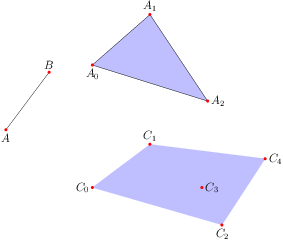

In [39]:
Image(filename='Imag/infasConvexa.png')

Infasuratoarea convexa a $n$ puncte din plan este cel mai mic poligon convex ce contine toate punctele.
In figura de mai sus infasuratoarea convexa  apunctelor $C_0, C_1, C_2, C_3, C_4$ este
poligonul plin, de varfuri $C_0, C_1, C_4, C_2$.

Daca $A, B$ sunt doua puncte in
plan sau spatiu, o combinatie convexa a lor este un
punct $M=\alpha_1 A+\alpha_2 B$, $\alpha_i\in[0,1]$, $\alpha_1+\alpha_2=1$.
Notand $\alpha_2=t$, rezulta ca $\alpha_1=1-t$ si deci
punctul $M$ se exprima ca o combinatie convexa a lui $A$
si $B$ astfel:
$$M=(1-t)A+tB, \,\, t\in[0,1]$$
Punctul $M$ astfel definit apartine segmentului $[A,B]$.

   Daca $\vec{AM}=r\vec{MB}$, spunem ca punctul $M\neq B$, imparte segmentul
$[A,B]$ in raportul $r$.

 Un
punct $M\neq B$ al segmentului $[A,B]$, $M=(1-t)A+tB$, imparte
segmentul in raportul $\displaystyle\frac{t}{1-t}$ si reciproc,
daca $M$ imparte segmentul $[A,B]$ in raportul
$\displaystyle\frac{t}{1-t}$, $t\neq 1$, atunci $M=(1-t)A+tB$.

Intr-adevar:
$$\begin{array}{l}M=(1-t)A+tB\,\, \Leftrightarrow\,\,
M=A+t\vec{AB}\,\,\Leftrightarrow\,\, \vec{AM}=t(\vec{AM}+\vec{MB})\,\,\Leftrightarrow\\
\Leftrightarrow\,\, (1-t)\vec{AM}=t\vec{MB}\,\,\Leftrightarrow
\vec{AM}=\displaystyle\frac{t}{1-t}\vec{MB}\end{array}$$


Pornind de la aceasta proprietate explicam mai
intai schema lui de Casteljau pentru cazul curbei
definita de 3 puncte de control ${\bf b}_0, {\bf b}_1, {\bf b}_2$. Acestea fiind
punctele initiale (date), se renoteaza ${\bf b}_0^0, {\bf b}^0_1, {\bf
b}^0_2$, indicele $0$ din pozitia de sus indicand etapa 0 a
procedurii.

Fixand un parametru $t\in[0,1)$, acesta
imparte segmentul $[0,1]$ in raportul $\displaystyle\frac{t}{1-t}$.




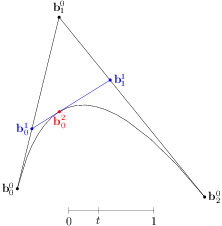

In [40]:
Image(filename='Imag/cbezier0C.png')

- In etapa 1 se
determina pe fiecare segment determinat de doua puncte de
control consecutive, punctul ce imparte segmentul respectiv
in acelasi raport $\displaystyle\frac{t}{1-t}$ in care $t$ imparte pe $[0,1]$:

$$\begin{array}{lll}{\bf b}^1_0&=&(1-t)
{\bf b}_0^0+t{\bf b}^0_1\\
{\bf b}^1_1&=&(1-t){\bf b}_1^0+t{\bf b}^0_2\end{array}$$


- In etapa a doua, pe
segmentul determinat de cele doua puncte calculate in etapa
precedenta se determina punctul ${\bf b}^2_0$ ce
imparte segmentul $[{\bf b}^1_0, {\bf b}^1_1]$ in raportul
$\displaystyle\frac{t}{1-t}$: 

$${\bf b}^2_0=(1-t){\bf
b}^1_0+t{\bf b}^1_1$$


Inlocuind punctele calculate in etapa 1  in exprimarea lui ${\bf b}_0^2$, calculat in etapa 2, 
 obtinem: 
$$\begin{array}{lll}{\bf b}^2_0&=&(1-t)[(1-t){\bf
b}_0^0+t{\bf b}^0_1]+t[(1-t){\bf b}_1^0+t{\bf
b}^0_2]=\\&=&\underbrace{(1-t)^2}_{B^2_0(t)}{\bf
b}_0^0+\underbrace{2t(1-t)}_{B^2_1(t)}{\bf b}_1^0+\underbrace{t^2}_{B^2_2(t)}{\bf
b}^0_2=b(t)\end{array},$$  adica punctul $b^2_0$ reprezinta parametrizarea curbei data de B&eacute;zier, in baza
Bernstein, evaluata in parametrul $t$.

Remarcam ca  in fiecare etapa a schemei de
Casteljau, numarul punctelor calculate se reduce cu o unitate
fata de etapa precedenta si in ultima etapa
rezulta punctul de pe curba B&eacute;zier, corespunzator parametrului
$t$.

In figura urmatoare ilustram algoritmul de Casteljau pentru o curba definita de 4 puncte de control:

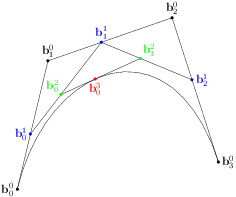

In [41]:
Image(filename='Imag/Decast4p.png')

Generalizand la  cazul unei curbe definite de un numar
arbitrar de puncte de control, $ {\bf b}_{0},  {\bf b}_{1}, \ldots,  {\bf b}_{n}$, $n\geq 1$, dupa
$n$ etape a schemei de Casteljau aplicata dupa acelasi
principiu, folosind un parametru $t\in[0,1]$, se obtine un punct
pe curba B&eacute;zier corespunzator acestui parametru.

Punctele de control calculate in etapele intermediare se pot
afisa, teoretic, intr-o matrice triunghiulara de puncte.
 Si anume punctele
 de control sunt puncte initiale, date, deci corespund etapei 0 a procedurii
recursive si le adaugam indicele 0 in pozitia
de sus:
 $$
\begin{array}{llllll} 
{\bf b}_0^0     &  {\bf b}_{0}^1         &  {\bf b}_{0}^2& \cdots       & {\bf b}_0^{n-1}& {\bf b}^n_0\\
{\bf b}_1^0     &   {\bf b}_{1}^1         & {\bf b}_{1}^2& \cdots       & {\bf b}_1^{n-1}& \\
{\bf b}_2^0     &   {\bf b}_{2}^1        & {\bf b}_{2}^2   & \cdots       &  & \\
\vdots          &          \vdots        &\vdots       &        & & \\
{\bf b}_{n-2}^0 &  {\bf b}_{n-2}^1&       {\bf b}_{n-2}^2& & & \\
{\bf b}_{n-1}^0 &  {\bf b}_{n-1}^1       & &  & & \\
{\bf b}_n^0     &      & & & &  \end{array} $$

 Punctele din coloana
$r$ corespund etapei $r$ a schemei recursive, $r=\overline{1,n}$.

Succint,   schema de Casteljau se exprima prin formula $$ {\bf
b}_{i}^{r}(t)=(1-t)\,{\bf b}_{i}^{r-1}(t)+t\,{\bf b}_{i+1}^{r-1}(t),\:
r=\overline{1,n},\: i=\overline{0,n-r}, $$ adica punctul din pozitia $i$ a  etapei $r$
este o combinatie convexa a punctelor $i$ si $i+1$ din
etapa $r-1$:
$$
\begin{array}{lll} {\bf b}^{r-1}_i&\stackrel{1-t}{\rightarrow}&{\bf
b}^{r}_i\\
{\bf b}^{r-1}_{i+1}&\stackrel{\nearrow}{t}&\end{array}$$


Desi la prima
vedere s-ar parea ca pentru implementarea schemei de
Casteljau avem nevoie de o matrice triunghiulara de puncte,
in realitate este suficient un sir auxiliar de puncte
$({\bf a}_0,{\bf a}_1,\ldots {\bf a}_n)$, in care la fiecare
apel al schemei de Casteljau se copiaza punctele de control
$({\bf b}_0,{\bf b}_1,\ldots {\bf b}_n)$, ${\bf a}_i={\bf b}_i$,
$i=0,1,\ldots n$.

In etapa $1$, de exemplu, calculam
$(1-t){\bf a}_0+t{\bf a}_1$ si pentru ca punctul ${\bf a}_0$
nu va mai fi folosit in aceasta etapa, atribuim
$(1-t){\bf a}_0+t{\bf a}_1\to {\bf a}_0$, $\ldots$, $(1-t){\bf a}_i+t{\bf a}_{i+1}\to {\bf a}_i$. 

In fiecare
etapa $r$ a schemei de Casteljau doar primele punctele ${\bf a}_0,
{\bf a}_{1}, \ldots, {\bf a}_{n-r}$ isi modifica
"continutul": 

$$\begin{array}{cccccc}
\mbox{Etapa}\,\, 0&\mbox{Etapa}\,\,1&\mbox{Etapa}\,\,2&\cdots&\mbox{Etapa}\,\, n-1&\mbox{Etapa}\,\,n\\
\downarrow&\downarrow&\downarrow&\cdots&\downarrow&\downarrow\\
{\bf a}_0    &  {\bf a}_{0}       &  {\bf a}_{0}& \cdots       & {\bf a}_0& {\bf a}_0\\
{\bf a}_1    &   {\bf a}_{1}       & {\bf a}_{1}& \cdots       & {\bf a}_1& \\
{\bf a}_2    &   {\bf a}_{2}      & {\bf a}_{2}   & \cdots       &  & \\
\vdots          &          \vdots        &\vdots       &        & & \\
{\bf a}_{n-2}&  {\bf a}_{n-2}&       {\bf a}_{n-2}& & & \\
{\bf a}_{n-1}&  {\bf a}_{n-1}     & &  && \\
{\bf a}_n    &      & & &&  \end{array} $$

 In etapa $n$
punctul ${\bf a}_0$ contine punctul curbei B&eacute;zier
corespunzator parametrului $t$.

Pentru a discretiza  o curba B&eacute;zier, se divizeaza intervalul
$[0,1]$ prin puncte echidistante. Fixand numarul  $N$ de
subintervale egale ale intervalului $[0,1]$,  pasul de divizare este
$h=1.0/N$, iar punctele
 de
diviziune sunt $t_j=j*h$, $j=0,1,2,\ldots, N$.

Pentru fiecare
parametru $t_j$, $j=0,1,\ldots N$, se apeleaza schema
(functia) de Casteljau, obtinand astfel punctele ${\bf
P}_j$, de pe curba, care apoi se interpoleaza liniar si obtinem imaginea curbei.


In [42]:
def deCasteljau(t,b): #punctele de control b_0, b_1, ..., b_n, sunt date intr-un array 2D, 
                      #de n+1 linii si 2 coloane. Pe linia i avem coordonatele punctului b_i
                       
    a=np.copy(b) # se copiaza array-ul b in array-ul a
    N=a.shape[0] # interogam cat este numarul de linii ale lui a (deci si ale lui b); n=N-1
    for r in range(1,N): # echivalentul in C a lui for(r=1;r<N, r++); deci 1<=r<=n
        for i in range(N-r):# in C for(i=0; i<N-r;i++)
            a[i,:]=(1-t)*a[i,:]+t*a[i+1,:]# punctul i din etapa r este combinatia convexa 
                                          # a punctelor i si i+1 din etapa r-1
    return a[0,:]# a[0,:] contine coordonatele pctului de pe curba coresp lui t           

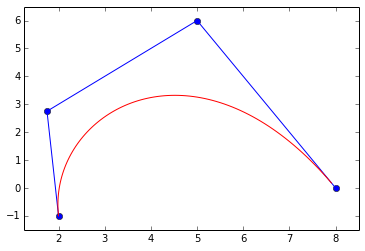

In [43]:

def dreptunghiDesen(b):
    cmin=np.zeros(2) # cmin[i] va stoca coordonata i, minima, a punctelor de control
    cmax=np.zeros(2)# cmax[i] va stoca coordonata i, maxima, a punctelor de control
    for i in range(2):
        cmin[i]=np.amin(b[:,i])-0.5
        cmax[i]=np.amax(b[:,i])+0.5
    return (cmin, cmax)  

def curbaBezier(b, nr=100):#nr=nr de puncte ce se calculeaza pe curba   
    h=1.0/nr
    pcteC=[]
    for k in range(nr):
        t=k*h# 0.01 este pasul de divizare a intervalului [0,1], al parametrului t
        P=deCasteljau(t,b)# P punct pe curba Bezier, corespunzator lui t
        pcteC.append(P)
    return pcteC# functia returneaza lista punctelor de pe curba calculate

def DrawBezier(b):
    cmin, cmax=dreptunghiDesen(b)
    plt.axis([cmin[0], cmax[0], cmin[1], cmax[1]])
    plt.plot(b[:, 0], b[:,1],  'bo',  b[:, 0], b[:,1])#marcheaza punctele de control si 
                                                      #traseaza poligonul de control 
    pcteC=curbaBezier(b)# pcteC este lista punctelor calculate pe curba
    
    Xpcte, Ypcte=zip(*pcteC)# functia zip() extrage din lista  pcteC, lista x-silor, si y-cilor        
    
    plt.plot(Xpcte, Ypcte, 'r')
    
################
# Pentru a a genera o curba Bezier este suficient sa declaram array-ul punctelor
b=np.array([[2,-1],[1.75,2.75], [5,6], [8,0]], float)# 4 puncte de control
DrawBezier(b)

#### Proprietati ale curbelor Bezier              

- Parametrizarea in baza Bernstein a unei curbe B&eacute;zier,
$b(t)=B^n_0(t) {\bf b}_0+B^n_1(t) {\bf b}_1+\cdots+B^n_n(t) {\bf b}_n$, $t\in[0,1]$,
este o combinatie convexa a punctelor de control, deoarece pentru fiecare $t\in[0,1]$,
polinoamele Bernstein, $B^n_k(t)=C_n^k t^k(1-t)^{n-k}\geq 0$ si suma lor este egala cu 1.

Intradevar:
$$\sum_{k=0}^n B_k^n(t)=\underbrace{\sum_{k=0}^n C_n^k t^k(1-t)^{n-k}=(t+(1-t))^n}_{formula\:\: binomului\:\: lui\:\: Newton}=1$$

Deci o curba B&eacute;zier este inclusa in infasuratoarea convexa a punctelor sale de control.
Aceasta proprietate are importanta in grafica, pentru a sti unde anume in plan este plasata curba. In exemplul de mai sus am exploatat deja aceasta proprietate, indicand ca dreptunghi de desen, un dreptunghi care include toate punctele de control, deci si infasuratoarea lor convexa.

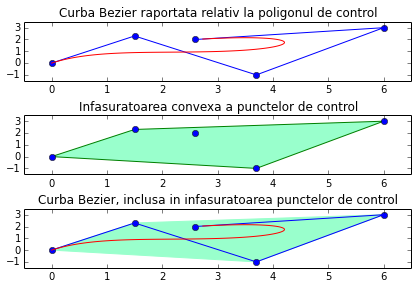

In [44]:
b=np.array([[0,0], [1.5, 2.3], [3.7, -1], [6, 3], [2.6, 2]],float)
plt.subplot(3,1,1)
plt.title('Curba Bezier raportata relativ la poligonul de control')
DrawBezier(b)

plt.subplot(3,1,2)
plt.title('Infasuratoarea convexa a punctelor de control')
cmin, cmax=dreptunghiDesen(b)
plt.axis([cmin[0], cmax[0], cmin[1], cmax[1]])
Vx=[]
Vy=[]
for i in [0,1,3,2, 0]:
    Vx.append(b[i,0])
    Vy.append(b[i,1])
plt.fill(Vx,Vy, color='#99FFCC', edgecolor='g')
plt.plot(b[:, 0], b[:,1],  'bo')

plt.subplot(3,1,3)
plt.title('Curba Bezier, inclusa in infasuratoarea punctelor de control')
plt.fill(Vx,Vy, color='#99FFCC')
DrawBezier(b) 

plt.tight_layout(0.75)# aceasta functie include 0.75* spatiu intre figurile din subplots    


- Gradul unei curbe B&eacute;zier este mai mic cu o unitate
decat numarul punctelor sale de control. Astfel o curba
B&eacute;zier de grad 1 este generata de doua puncte de control
${\bf b}_0, {\bf b}_1$, $b(t)={\bf b}_0 B_0^1(t)+{\bf b}_1B_1^1(t)$ $=(1-t){\bf b}_0+t{\bf b}_1=
{\bf b}_0
+ t\vec{{\bf b}_0{\bf b}_1}$, si este segmentul determinat de cele doua
puncte.



- O curba B&eacute;zier  generata de trei puncte de control este un arc
de parabola:



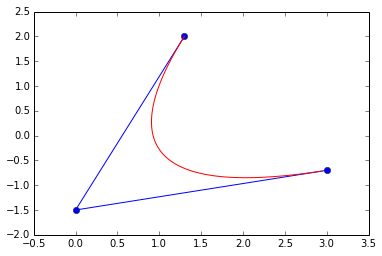

In [45]:
b=np.array([[1.3, 2], [0,-1.5] , [3, -0.7]], float)
DrawBezier(b)

- O curba B&eacute;zier interpoleaza
extremitatile poligonului sau de control (adica trece sigur prin ${\bf b}_0$ si ${\bf b}_n$,
deoarece daca $b$ este parametrizarea Bernstein, atunci $b(0)={\bf b}_0$ si $b(1)={\bf b}_n$. O curba B&eacute;zier nu  trece insa  prin punctele de control intermediare.


- O curba B&eacute;zier imita forma poligonului
de control.



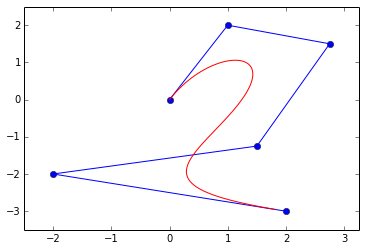

In [46]:
b=np.array([[0,0],  [1,2], [2.75, 1.5],[1.5, -1.25],[-2,-2],[2,-3]],float)
DrawBezier(b)

- Tangentele in extremitatile arcului
de curba B&eacute;zier au directiile $\overrightarrow{{\bf b}_0{\bf b}_1}$, respectiv 
$\overrightarrow{{\bf b}_{n-1}{\bf b}_{n}}$:
$$
\dot{\vec{b}}(t=0)=n\,\overrightarrow{{\bf b}_0{\bf b}_1}, \quad \dot{\overrightarrow{b}}(1)=n\,\overrightarrow{\bf b}_{n-1}{\bf b}_n
$$

- In procesul iterativ al schemei de Casteljau, de evaluare a unui punct $b(t)$, de pe curba B&eacute;zier
 definita de punctele de control $ {\bf b}_{0},  {\bf b}_{1}, \ldots,  {\bf b}_{n}$, se determina practic si directia tangentei (a vectorului viteza la momentul $t$)
 la curba in acel punct. Si anume se poate demonstra ca  vectorul
 tangent la curba B&eacute;zier in punctul corespunzator parametrului  $\bf t\in[0,1]$ este:

 $$
 \dot{\vec{b}}(t)=n({\bf b}_{1}^{n-1}(t)-{\bf b}_{0}^{n-1}(t))=n\,\overrightarrow{{\bf b}_{0}^{n-1}(t){\bf b}_{1}^{n-1}(t)},
 $$
  unde  ${\bf b}_{0}^{n-1}(t)$,$\,\,{\bf b}_{1}^{n-1}(t)$ sunt punctele
 calculate in penultima etapa $($etapa $n-1$ $)$ a schemei de Casteljau.
 
 

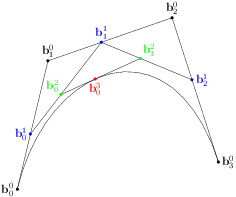

In [47]:
Image(filename='Imag/Decast4p.png')

In aceasta figura se observa ca segmentul  de extremitati ${\bf b}^2_0, {\bf b}^2_1$ este tangent la curba in
${\bf b}^3_0$.

Functia urmatoare calculeaza directia (vectorul director) al tangentei (vitezei) in ${\bf b}^n_0(t)$:

In [48]:
def tangBezier(b,t):
    a=np.copy(b) 
    N=a.shape[0] 
    for r in range(1,N-1): #  deci 1<=r<=n-1, unde n=N-1
        for i in range(N-r):
            a[i,:]=(1-t)*a[i,:]+t*a[i+1,:]
    v=a[1,:]-a[0,:] #vectorul director al vitezei in b(t)           
    return v 

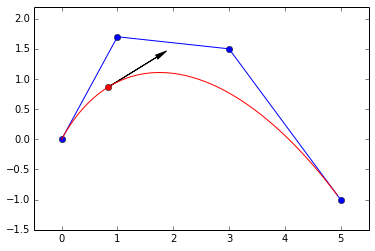

In [49]:
b=np.array([[0,0], [1,1.7],[3, 1.5], [5, -1]],float)
DrawBezier(b)
t=0.23
P=deCasteljau(t,b)
plt.plot(P[0], P[1], 'ro')
v=tangBezier(b,t)
v=v/np.linalg.norm(v) #versorul vitezei

plt.arrow(P[0], P[ 1], v[0], v[1], fc="k", ec="k",head_width=0.075, head_length=0.2)



In ultimul bloc de cod puteti inlocui pe $t$ cu diverse valori in $[0,1]$ si vedeti directia vitezei.

Curbele Bezier se genereaza deobicei interactiv, alegand punctele de control cu mouse-ul si apoi
trasand curba corespunzatoare.
Pentru generarea interactiva veti primi un script ce se ruleaza in Spyder.

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()